# Type of Stay Prediction Model
The goal of the project is to predict the type of stay a certain booking will be depending on various features.

Questions about the data:
1. How do we make sense of the LOC_DESC?
        >> distinct hotel?
        >> branch of hotel??
        >> compare with MTG_SPACE, RATE_SEGMENT, BKG_CHANNEL
2. How is the MTG_SPACE correlated with the STY_PURPOSE?
        >> may be also correlated with the other features
3. 

## Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os
from os import path

## 1. Data Extraction and Preprocessing

### 1.1. Data Extraction and Characterization

In [2]:
# Load the data
df = pd.read_excel("Machine Learning Exercise_final.xlsx", sheet_name="Data")
display(df.head(10))
display(df.info())

,LOC_DESC,MTG_SPACE,BKG_WINDOW,LOS,GST_QTY,RM_QTY,RATE_INDEX,CKIN_DOW,BKG_DOW,RATE_SEGMENT,BKG_CHANNEL,STY_PURPOSE
0,Location_1,40.0,12,2,2,1,1.786213,Friday,Sunday,Rate_12,Channel_2,Leisure
1,Location_8,NaN,0,17,1,1,0.683055,Monday,Monday,Rate_4,Channel_5,Business
2,Location_3,20.0,0,1,1,1,1.018693,Friday,Saturday,Rate_8,Channel_5,NaN
3,Location_9,900.0,3,3,1,1,0.662536,Monday,Friday,Rate_3,Channel_3,NaN
4,Location_7,85.0,0,1,2,1,0.263328,Friday,Saturday,Rate_8,Channel_2,NaN
5,NaN,1007.0,0,1,2,1,0.619632,Monday,Monday,Rate_12,Channel_4,NaN
6,Location_9,240.0,2,1,1,1,0.911990,Saturday,Thursday,Rate_7,Channel_5,NaN
7,Location_7,10.0,0,1,3,1,1.267767,Monday,Tuesday,Rate_12,Channel_5,NaN
8,Location_8,60.0,7,28,1,1,1.039057,Thursday,Thursday,Rate_8,Channel_5,NaN
9,Location_8,0.0,3,2,1,1,1.013176,Saturday,Wednesday,Rate_5,Channel_4,Leisure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466451 entries, 0 to 466450
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LOC_DESC      443556 non-null  object 
 1   MTG_SPACE     449840 non-null  float64
 2   BKG_WINDOW    466451 non-null  int64  
 3   LOS           466451 non-null  int64  
 4   GST_QTY       466451 non-null  int64  
 5   RM_QTY        466451 non-null  int64  
 6   RATE_INDEX    466366 non-null  float64
 7   CKIN_DOW      466451 non-null  object 
 8   BKG_DOW       466451 non-null  object 
 9   RATE_SEGMENT  466451 non-null  object 
 10  BKG_CHANNEL   465835 non-null  object 
 11  STY_PURPOSE   135992 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 42.7+ MB


None

#### Findings
1. We shall use the 135 992 labelled records as the training and validation set while the rest of the dataset as the prediction set
2. But we shall perform preprocessing and EDA still for the whole dataset

In [3]:
# Check value counts for each features
for col in df.columns:
    display(df[col].value_counts())

Location_8    180493
Location_7    101505
Location_9     58849
Location_1     41346
Location_3     30498
Location_5     16671
Location_6      9112
Location_2      4744
Location_4       338
Name: LOC_DESC, dtype: int64

0.0       51819
60.0       9727
50.0       9271
100.0      9161
40.0       8900
          ...  
1094.0       44
467.0        41
357.0        23
826.0        15
614.0         5
Name: MTG_SPACE, Length: 595, dtype: int64

0      220343
1       38234
2       24129
3       22188
4       17576
        ...  
367         1
395         1
361         1
382         1
353         1
Name: BKG_WINDOW, Length: 357, dtype: int64

1     277673
2      82759
3      38674
4      24011
5      11342
       ...  
82        26
88        26
87        24
97        23
94        18
Name: LOS, Length: 99, dtype: int64

1     284652
2     160341
3      11175
4       8349
5        801
6        634
8        176
7         90
10        67
12        49
9         44
14        22
16        13
18         9
11         9
15         7
17         4
13         3
99         1
30         1
26         1
19         1
20         1
24         1
Name: GST_QTY, dtype: int64

1     466190
2        164
3         38
4         14
9         12
6          9
7          8
5          8
10         4
8          2
11         1
17         1
Name: RM_QTY, dtype: int64

0.000000    2167
1.000000    1270
1.000000      59
0.974359      26
1.025641      16
            ... 
1.051521       1
0.960246       1
1.093203       1
1.165217       1
0.347622       1
Name: RATE_INDEX, Length: 446660, dtype: int64

Friday       87301
Saturday     73674
Monday       73445
Thursday     61280
Tuesday      57286
Wednesday    57253
Sunday       56212
Name: CKIN_DOW, dtype: int64

Monday       74950
Friday       73411
Tuesday      71515
Thursday     70481
Wednesday    69212
Saturday     57076
Sunday       49806
Name: BKG_DOW, dtype: int64

Rate_12    183066
Rate_8      64381
Rate_5      63390
Rate_3      59201
Rate_7      34570
Rate_9      21257
Rate_6      18200
Rate_4       9432
Rate_11      8851
Rate_1       2128
Rate_10      1053
Rate_13       633
Rate_2        289
Name: RATE_SEGMENT, dtype: int64

Channel_5    174880
Channel_2    140016
Channel_4     82697
Channel_1     39412
Channel_3     28830
Name: BKG_CHANNEL, dtype: int64

Leisure     88613
Business    47379
Name: STY_PURPOSE, dtype: int64

In [4]:
# Create a subset of the whole data as the training and validation set
df_train_val = df[df["STY_PURPOSE"].notna()]
display(df_train_val.head(5))
display(df_train_val.info())

# Create a subset of the main dataframe for prediction dateset
df_pred = df[df["STY_PURPOSE"].isna()]
display(df_pred.head(5))
display(df_pred.info())

,LOC_DESC,MTG_SPACE,BKG_WINDOW,LOS,GST_QTY,RM_QTY,RATE_INDEX,CKIN_DOW,BKG_DOW,RATE_SEGMENT,BKG_CHANNEL,STY_PURPOSE
0,Location_1,40.0,12,2,2,1,1.786213,Friday,Sunday,Rate_12,Channel_2,Leisure
1,Location_8,NaN,0,17,1,1,0.683055,Monday,Monday,Rate_4,Channel_5,Business
9,Location_8,0.0,3,2,1,1,1.013176,Saturday,Wednesday,Rate_5,Channel_4,Leisure
18,NaN,200.0,11,1,2,1,0.304622,Saturday,Tuesday,Rate_8,Channel_1,Leisure
26,Location_3,90.0,1,1,1,1,0.991128,Friday,Thursday,Rate_12,Channel_2,Leisure


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135992 entries, 0 to 466443
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LOC_DESC      128846 non-null  object 
 1   MTG_SPACE     131478 non-null  float64
 2   BKG_WINDOW    135992 non-null  int64  
 3   LOS           135992 non-null  int64  
 4   GST_QTY       135992 non-null  int64  
 5   RM_QTY        135992 non-null  int64  
 6   RATE_INDEX    135968 non-null  float64
 7   CKIN_DOW      135992 non-null  object 
 8   BKG_DOW       135992 non-null  object 
 9   RATE_SEGMENT  135992 non-null  object 
 10  BKG_CHANNEL   135890 non-null  object 
 11  STY_PURPOSE   135992 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 13.5+ MB


None

,LOC_DESC,MTG_SPACE,BKG_WINDOW,LOS,GST_QTY,RM_QTY,RATE_INDEX,CKIN_DOW,BKG_DOW,RATE_SEGMENT,BKG_CHANNEL,STY_PURPOSE
2,Location_3,20.0,0,1,1,1,1.018693,Friday,Saturday,Rate_8,Channel_5,NaN
3,Location_9,900.0,3,3,1,1,0.662536,Monday,Friday,Rate_3,Channel_3,NaN
4,Location_7,85.0,0,1,2,1,0.263328,Friday,Saturday,Rate_8,Channel_2,NaN
5,NaN,1007.0,0,1,2,1,0.619632,Monday,Monday,Rate_12,Channel_4,NaN
6,Location_9,240.0,2,1,1,1,0.911990,Saturday,Thursday,Rate_7,Channel_5,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 330459 entries, 2 to 466450
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LOC_DESC      314710 non-null  object 
 1   MTG_SPACE     318362 non-null  float64
 2   BKG_WINDOW    330459 non-null  int64  
 3   LOS           330459 non-null  int64  
 4   GST_QTY       330459 non-null  int64  
 5   RM_QTY        330459 non-null  int64  
 6   RATE_INDEX    330398 non-null  float64
 7   CKIN_DOW      330459 non-null  object 
 8   BKG_DOW       330459 non-null  object 
 9   RATE_SEGMENT  330459 non-null  object 
 10  BKG_CHANNEL   329945 non-null  object 
 11  STY_PURPOSE   0 non-null       object 
dtypes: float64(2), int64(4), object(6)
memory usage: 32.8+ MB


None

### 1.2. Data Preprocessing and Cleaning

In [5]:
# Create a class for data preprocessing
class DataPreprocessor:
    def __init__(self, df):
        self.df = df
    
    def process_data(self):
        # For LOC_DESC
        self.df["LOC_DESC_NUM"] = self.df["LOC_DESC"].str.replace("Location_", "", regex=True)

        # For RATE_SEGMENT2
        self.df["RATE_SEGMENT_NUM"] = self.df["RATE_SEGMENT"].str.replace("Rate_", "", regex=True)

        # For BKG_CHANNEL
        self.df["BKG_CHANNEL_NUM"] = self.df["BKG_CHANNEL"].str.replace("Channel_", "", regex=True)

        return self.df

# Create instance of the class
data_preprocessor = DataPreprocessor(df=df)
df_preprocessed = data_preprocessor.process_data()

In [6]:
# Display the summary statistics of the original dataframe
display(df.describe(include="all"))

,LOC_DESC,MTG_SPACE,BKG_WINDOW,LOS,GST_QTY,RM_QTY,RATE_INDEX,CKIN_DOW,BKG_DOW,RATE_SEGMENT,BKG_CHANNEL,STY_PURPOSE,LOC_DESC_NUM,RATE_SEGMENT_NUM,BKG_CHANNEL_NUM
count,443556,449840.000000,466451.000000,466451.000000,466451.000000,466451.000000,466366.000000,466451,466451,466451,465835,135992,443556,466451,465835
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,7,7,13,5,2,9,13,5
top,Location_8,NaN,NaN,NaN,NaN,NaN,NaN,Friday,Monday,Rate_12,Channel_5,Leisure,8,12,5
freq,180493,NaN,NaN,NaN,NaN,NaN,NaN,87301,74950,183066,174880,88613,180493,183066,174880
mean,NaN,311.509323,8.389162,2.834862,1.468456,1.001241,0.971615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,639.395749,23.192502,6.813430,0.743394,0.075064,0.278506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,40.000000,0.000000,1.000000,1.000000,1.000000,0.875501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,94.000000,1.000000,1.000000,1.000000,1.000000,0.996256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,250.000000,7.000000,2.000000,2.000000,1.000000,1.100877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Create class to impute missing values using mode and median
class ImputerEncoder:
    
    def __init__(self, cat_cols=None, num_cols=None):
        self.cat_cols = cat_cols
        self.num_cols = num_cols
    
    def fit_transform(self, data):
        if self.cat_cols is None:
            self.cat_cols = data.select_dtypes(include=['object']).columns.tolist()
        if self.num_cols is None:
            self.num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
        for col in self.cat_cols:
            data[col].fillna(data[col].mode()[0], inplace=True)
            data[col] = pd.factorize(data[col])[0]
        for col in self.num_cols:
            data[col].fillna(data[col].median(), inplace=True)
        return data

cat_impute = ImputerEncoder()
df_impute = df.drop(columns=["STY_PURPOSE", "CKIN_DOW", "BKG_DOW"])
data_transformed = cat_impute.fit_transform(df_impute)
df = pd.concat([data_transformed, df[["STY_PURPOSE", "CKIN_DOW", "BKG_DOW"]]], axis=1)
display(df.info())
display(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466451 entries, 0 to 466450
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LOC_DESC          466451 non-null  int64  
 1   MTG_SPACE         466451 non-null  float64
 2   BKG_WINDOW        466451 non-null  int64  
 3   LOS               466451 non-null  int64  
 4   GST_QTY           466451 non-null  int64  
 5   RM_QTY            466451 non-null  int64  
 6   RATE_INDEX        466451 non-null  float64
 7   RATE_SEGMENT      466451 non-null  int64  
 8   BKG_CHANNEL       466451 non-null  int64  
 9   LOC_DESC_NUM      466451 non-null  int64  
 10  RATE_SEGMENT_NUM  466451 non-null  int64  
 11  BKG_CHANNEL_NUM   466451 non-null  int64  
 12  STY_PURPOSE       135992 non-null  object 
 13  CKIN_DOW          466451 non-null  object 
 14  BKG_DOW           466451 non-null  object 
dtypes: float64(2), int64(10), object(3)
memory usage: 53.4+ MB


None

,LOC_DESC,MTG_SPACE,BKG_WINDOW,LOS,GST_QTY,RM_QTY,RATE_INDEX,RATE_SEGMENT,BKG_CHANNEL,LOC_DESC_NUM,RATE_SEGMENT_NUM,BKG_CHANNEL_NUM,STY_PURPOSE,CKIN_DOW,BKG_DOW
count,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,466451.000000,135992,466451,466451
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leisure,Friday,Monday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88613,87301,74950
mean,2.204838,303.763499,8.389162,2.834862,1.468456,1.001241,0.971619,2.447149,1.369694,2.204838,2.447149,1.369694,NaN,NaN,NaN
std,1.665307,629.200099,23.192502,6.813430,0.743394,0.075064,0.278481,2.466205,1.301887,1.665307,2.466205,1.301887,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1.000000,42.000000,0.000000,1.000000,1.000000,1.000000,0.875547,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
50%,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,0.996256,2.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN
75%,4.000000,240.000000,7.000000,2.000000,2.000000,1.000000,1.100847,4.000000,3.000000,4.000000,4.000000,3.000000,NaN,NaN,NaN


## 2. Exploratory Data Analysis

### 2.0. Summary Statistics

In [8]:
# Group the data by the categorical variables
cat_cols = ["LOC_DESC", "CKIN_DOW", "BKG_DOW", "BKG_CHANNEL", "RATE_SEGMENT"]

for col in cat_cols:
    df_pivot = pd.pivot_table(
        data=df,
        index=col, 
        values=["MTG_SPACE", "BKG_WINDOW", "LOS", "GST_QTY", "RM_QTY", "RATE_INDEX"],
        aggfunc=[np.mean, np.std, np.min, np.max]
    )
    display(df_pivot)

mean                                                       \
         BKG_WINDOW   GST_QTY       LOS   MTG_SPACE RATE_INDEX    RM_QTY   
LOC_DESC                                                                   
0          9.648914  1.398104  2.643714  490.514826   0.981432  1.001645   
1          7.595669  1.459639  3.103044  288.460799   0.972054  1.001155   
2          6.816021  1.420093  2.261919  300.605810   0.962170  1.000525   
3         10.872572  1.528607  2.737821  496.662730   0.976812  1.001427   
4          7.208049  1.442185  2.646106  156.304684   0.965802  1.001300   
5          7.072981  1.445566  2.940299   71.143547   0.969347  1.001646   
6         16.192190  1.786695  2.424930  324.052666   0.975502  1.000900   
7         11.060708  1.502740  3.136383  508.247260   0.977816  1.002951   
8          9.147929  1.600592  3.263314   50.715976   0.987873  1.000000   

                std                                  ... amin            \
         BKG_WINDOW   GST_QTY       LOS   MTG_SPACE  ...  LOS MTG_SPACE   
LOC_DESC                                             ...                  
0         24.554867  0.700970  6.615301  843.574313  ...    1       0.0   
1         21.448799  0.756737  7.621137  592.462330  ...    1       0.0   
2         21.337533  0.714930  5.178209  722.631711  ...    1       0.0   
3         26.891245  0.731697  6.141530  780.449675  ...    1       0.0   
4         21.504534  0.719461  6.160860  435.181869  ...    1       0.0   
5         22.158013  0.731483  7.418437  105.895296  ...    1       0.0   
6         34.194383  0.832292  4.174147  441.809965  ...    1       0.0   
7         25.283243  0.724553  7.775833  781.244620  ...    1       0.0   
8         23.568865  0.699894  9.286339   35.830326  ...    1       0.0   

                                 amax                                          
         RATE_INDEX RM_QTY BKG_WINDOW GST_QTY LOS MTG_SPACE RATE_INDEX RM_QTY  
LOC_DESC                                                                       
0               0.0      1        349      19  99    7570.0   8.032301     10  
1               0.0      1        395      99  99    7000.0  13.909381     11  
2               0.0      1        365      16  99    6000.0   5.000000      4  
3               0.0      1        349      18  99    5713.0  11.830224     17  
4               0.0      1        382      30  99    6782.0   6.930055     10  
5               0.0      1        347      13  99     769.0   3.594875      9  
6               0.0      1        349      16  99    2454.0   3.975263      6  
7               0.0      1        342      18  99    2871.0   7.547880      9  
8               0.0      1        234       5  99      83.0   2.315732      1  

[9 rows x 24 columns]

mean                                                       \
          BKG_WINDOW   GST_QTY       LOS   MTG_SPACE RATE_INDEX    RM_QTY   
CKIN_DOW                                                                    
Friday     11.046918  1.628572  2.375631  314.787551   0.964486  1.001019   
Monday      6.784587  1.302281  3.538934  284.190006   0.983540  1.001130   
Saturday    8.231642  1.632896  2.117966  306.862177   0.960913  1.001710   
Sunday      8.199175  1.419501  3.977211  301.912261   0.975502  1.001352   
Thursday    9.414034  1.490535  2.614638  308.214523   0.970548  1.001240   
Tuesday     6.722550  1.334113  2.872726  301.440596   0.976580  1.001239   
Wednesday   7.354759  1.384731  2.630674  307.453181   0.973350  1.001013   

                 std                                  ... amin            \
          BKG_WINDOW   GST_QTY       LOS   MTG_SPACE  ...  LOS MTG_SPACE   
CKIN_DOW                                              ...                  
Friday     27.794517  0.840949  5.857832  649.283025  ...    1       0.0   
Monday     18.356418  0.672121  7.477410  610.016838  ...    1       0.0   
Saturday   22.860709  0.768947  5.807982  621.065588  ...    1       0.0   
Sunday     21.527338  0.702225  8.467771  621.525539  ...    1       0.0   
Thursday   26.125226  0.741698  6.450439  630.260171  ...    1       0.0   
Tuesday    20.331219  0.653457  7.093351  629.454955  ...    1       0.0   
Wednesday  21.940258  0.668043  6.518543  638.206345  ...    1       0.0   

                                  amax                                          
          RATE_INDEX RM_QTY BKG_WINDOW GST_QTY LOS MTG_SPACE RATE_INDEX RM_QTY  
CKIN_DOW                                                                        
Friday           0.0      1        395      99  99    7570.0   5.862233      9  
Monday           0.0      1        347      24  99    7570.0  13.036686      9  
Saturday         0.0      1        349      30  99    7570.0  13.909381     17  
Sunday           0.0      1        365      18  99    7570.0   8.131939     10  
Thursday         0.0      1        349      18  99    7570.0   6.835067      9  
Tuesday          0.0      1        349      26  99    7570.0  10.821308     11  
Wednesday        0.0      1        349      19  99    7570.0   9.625293      9  

[7 rows x 24 columns]

mean                                                       \
          BKG_WINDOW   GST_QTY       LOS   MTG_SPACE RATE_INDEX    RM_QTY   
BKG_DOW                                                                     
Friday      8.091063  1.481631  3.001063  308.970263   0.967783  1.001308   
Monday      8.723202  1.417278  3.041428  300.017465   0.975901  1.001174   
Saturday    6.630458  1.547340  2.381351  287.577966   0.969376  1.001297   
Sunday      7.480725  1.521785  2.551861  287.460467   0.971863  1.002249   
Thursday    8.943134  1.459954  2.950540  311.218101   0.969074  1.000809   
Tuesday     9.255485  1.434454  2.903321  312.637223   0.974995  1.001007   
Wednesday   8.988384  1.450269  2.823990  310.616555   0.971829  1.001156   

                 std                                  ... amin            \
          BKG_WINDOW   GST_QTY       LOS   MTG_SPACE  ...  LOS MTG_SPACE   
BKG_DOW                                               ...                  
Friday     22.120846  0.818546  7.244838  634.262462  ...    1       0.0   
Monday     24.109058  0.732448  7.036465  629.254107  ...    1       0.0   
Saturday   21.754937  0.742350  5.875755  594.547300  ...    1       0.0   
Sunday     22.350238  0.751238  5.894749  594.083349  ...    1       0.0   
Thursday   23.526765  0.721461  7.218681  639.376676  ...    1       0.0   
Tuesday    24.093752  0.710269  6.915251  655.081291  ...    1       0.0   
Wednesday  23.635572  0.713578  6.877917  637.828511  ...    1       0.0   

                                  amax                                          
          RATE_INDEX RM_QTY BKG_WINDOW GST_QTY LOS MTG_SPACE RATE_INDEX RM_QTY  
BKG_DOW                                                                         
Friday           0.0      1        350      99  99    7570.0   5.700709      9  
Monday           0.0      1        382      24  99    7570.0  13.036686      8  
Saturday         0.0      1        365      30  99    7570.0   6.333333     10  
Sunday           0.0      1        349      18  99    7570.0  13.909381     17  
Thursday         0.0      1        353      19  99    7570.0   8.940603      9  
Tuesday          0.0      1        395      26  99    7570.0   8.217570      9  
Wednesday        0.0      1        349      17  99    7570.0  10.821308     11  

[7 rows x 24 columns]

mean                                                       \
            BKG_WINDOW   GST_QTY       LOS   MTG_SPACE RATE_INDEX    RM_QTY   
BKG_CHANNEL                                                                   
0            11.265777  1.549823  2.069942  271.036646   0.937906  1.001000   
1             6.091911  1.201298  3.957828  307.215788   0.996346  1.002484   
2             7.895491  1.046479  3.842872  307.173430   1.014224  1.000000   
3             7.008053  1.931025  1.714851  325.882801   0.945983  1.000036   
4            11.658023  1.707094  2.164645  355.750507   1.003911  1.000000   

                   std                                  ... amin            \
            BKG_WINDOW   GST_QTY       LOS   MTG_SPACE  ...  LOS MTG_SPACE   
BKG_CHANNEL                                             ...                  
0            25.887496  0.733681  3.482624  586.382923  ...    1       0.0   
1            21.759611  0.703343  9.941511  649.216987  ...    1       0.0   
2            13.774080  0.238344  6.574236  609.734194  ...    1       0.0   
3            19.636936  0.686829  1.643571  628.152215  ...    1       0.0   
4            29.348001  0.645447  4.176830  692.605358  ...    1       0.0   

                                    amax                                   \
            RATE_INDEX RM_QTY BKG_WINDOW GST_QTY LOS MTG_SPACE RATE_INDEX   
BKG_CHANNEL                                                                 
0                  0.0      1        382      24  99    7570.0   7.547880   
1                  0.0      1        365      99  99    7570.0  13.036686   
2                  0.0      1        322       6  99    7570.0   5.589251   
3                  0.0      1        337      12  77    7570.0   7.250000   
4                  0.0      1        395      30  99    7570.0  13.909381   

                    
            RM_QTY  
BKG_CHANNEL         
0                9  
1               17  
2                1  
3                3  
4                1  

[5 rows x 24 columns]

mean                                                        \
             BKG_WINDOW   GST_QTY        LOS   MTG_SPACE RATE_INDEX    RM_QTY   
RATE_SEGMENT                                                                    
0              3.935313  1.456600   2.014443  251.115177   1.091763  1.001857   
1             10.979220  1.562553  13.320611  234.575170   0.954942  1.001484   
2              9.363166  1.547289   1.607493  250.311847   0.698992  1.000450   
3              7.200166  1.123207   5.106485  278.651577   0.942748  1.000828   
4             20.538183  1.172172   3.850506  757.338617   0.953133  1.000839   
5             15.661382  1.793658   2.014261  279.754898   1.022449  1.000678   
6              8.497582  1.292912   3.681538  226.759451   0.968755  1.001374   
7              4.284706  2.058428   1.638096  389.903044   0.781049  1.000047   
8              6.689188  1.249011   4.589764  335.277370   0.938696  1.005197   
9              7.887688  1.046053   4.430921  274.602914   1.127477  1.000000   
10             6.930796  1.000000   2.072664  466.124567   0.872760  1.003460   
11            43.317536  1.778831   2.860979  628.995261   0.771950  1.000000   
12             5.848053  1.191833   6.669516  456.824311   0.077852  1.001899   

                    std                                    ... amin            \
             BKG_WINDOW   GST_QTY        LOS    MTG_SPACE  ...  LOS MTG_SPACE   
RATE_SEGMENT                                               ...                  
0             17.400554  0.768645   3.952469   542.909693  ...    1       0.0   
1             21.487722  0.959972  19.830216   554.252876  ...    1       0.0   
2             24.943001  0.680091   2.236649   549.360963  ...    1       0.0   
3             19.215045  0.436109  10.977601   570.765574  ...    1       0.0   
4             38.278764  0.500491   8.922079  1053.240097  ...    1       0.0   
5             25.202075  0.845949   2.519742   577.830043  ...    1       0.0   
6             23.782491  0.622026   8.789659   533.467267  ...    1       0.0   
7             17.694198  0.656151   1.843915   686.282441  ...    1       0.0   
8             22.360584  0.542976   9.780203   676.014953  ...    1       0.0   
9             16.020265  0.237015   8.043892   584.828811  ...    1       0.0   
10            11.516084  0.000000   3.682482   845.345988  ...    1       0.0   
11            62.383983  0.792605   2.756972   876.889870  ...    1       0.0   
12            19.877804  0.511512  16.049738   772.714802  ...    1       0.0   

                                     amax                                   \
             RATE_INDEX RM_QTY BKG_WINDOW GST_QTY LOS MTG_SPACE RATE_INDEX   
RATE_SEGMENT                                                                 
0              0.000000      1        349      99  99    7570.0  13.909381   
1              0.000000      1        343      30  99    6782.0   5.700709   
2              0.000000      1        353      20  99    7570.0   9.625293   
3              0.000000      1        349      16  99    7570.0  10.630984   
4              0.000000      1        395      14  99    7570.0  10.821308   
5              0.000000      1        367      18  99    7570.0   7.250000   
6              0.000000      1        347      18  99    7570.0   6.559617   
7              0.000000      1        337      16  84    7570.0   3.900072   
8              0.000000      1        350      10  98    7570.0   6.444450   
9              0.243222      1        275       5  99    7000.0   2.106245   
10             0.000000      1         46       1  40    6063.0   1.460923   
11             0.000000      1        347       6  45    5713.0   2.686583   
12             0.000000      1        349      10  99    5713.0   2.000000   

                     
             RM_QTY  
RATE_SEGMENT         
0                17  
1                 5  
2                 5  
3                 9  
4                 6  


### 2.1. Univariate Analysis

#### 2.1.1. Distribution Analysis

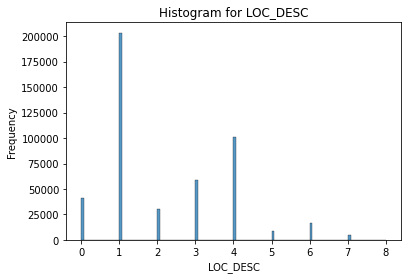

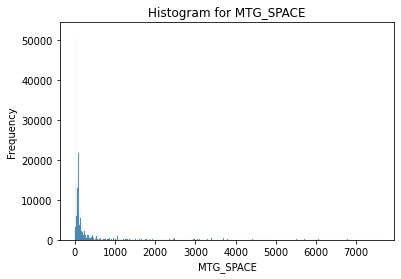

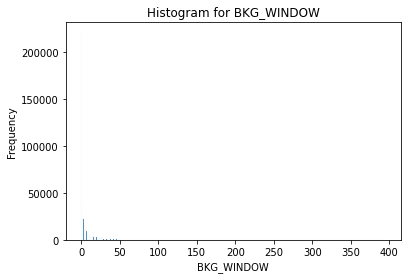

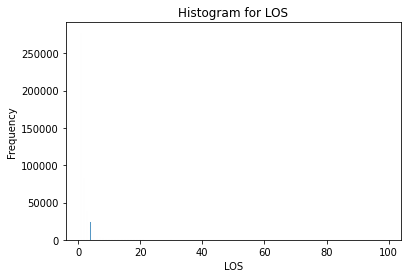

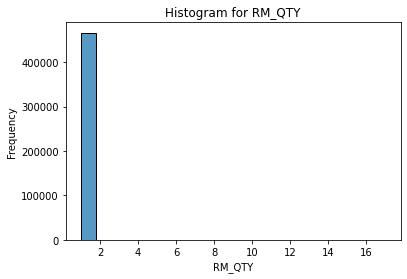

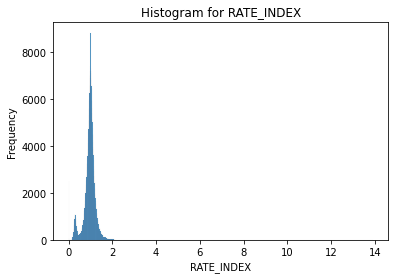

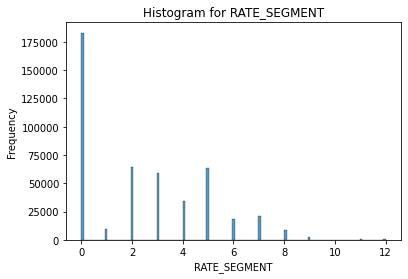

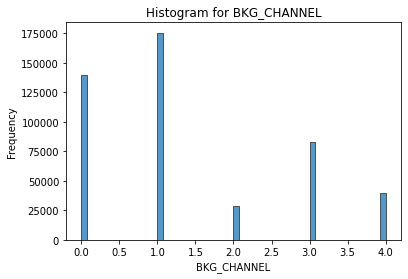

'\nFindings:\n1. Top 3 LOC_DESC: 8, 7, 9; Bottomn LOC_DESC: 2, 5, 6\n2. There are very high values for MTG_SPACE and BKG_WINDOW, LOS\n3. There are few RM_QTY values which can be a good point of analysis\n4. We have bimodal RATE_INDEX and at the same time having extreme values\n5. Top RATE_SEGMENT: 5, 8, 12. Rate 12 dominates the distribution. It is also good to analyze the rate segments 3, 5, 7, 8, and the bottom\nrate segments\n6. Top BKG_CHANNEL: 2, 5\n\nHypotheses:\n1. Majority of the hotel location bookings is from 7 and 8\n2. We have crazy high MTG_SPACE which can be attributed to the business type of stay\n3. Rate Segment 12 is making the distribution skewed. We can relate this to the other parameters and the target vector. The normally distributed\nrate segment may fall on the Leisure type of stay\n4. Booking channel frequency is linearly descending from 5, 2, 4, 1, 3\n'

In [9]:
# Location description
numerical_cols = ["LOC_DESC", "MTG_SPACE", "BKG_WINDOW", "LOS", "RM_QTY", "RATE_INDEX", "RATE_SEGMENT", "BKG_CHANNEL"]

for num_col in numerical_cols:
    sns.histplot(data=df, x=num_col)
    plt.xlabel(f"{num_col}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {num_col}")
    plt.show()

"""
Findings:
1. Top 3 LOC_DESC: 8, 7, 9; Bottomn LOC_DESC: 2, 5, 6
2. There are very high values for MTG_SPACE and BKG_WINDOW, LOS
3. There are few RM_QTY values which can be a good point of analysis
4. We have bimodal RATE_INDEX and at the same time having extreme values
5. Top RATE_SEGMENT: 5, 8, 12. Rate 12 dominates the distribution. It is also good to analyze the rate segments 3, 5, 7, 8, and the bottom
rate segments
6. Top BKG_CHANNEL: 2, 5

Hypotheses:
1. Majority of the hotel location bookings is from 7 and 8
2. We have crazy high MTG_SPACE which can be attributed to the business type of stay
3. Rate Segment 12 is making the distribution skewed. We can relate this to the other parameters and the target vector. The normally distributed
rate segment may fall on the Leisure type of stay
4. Booking channel frequency is linearly descending from 5, 2, 4, 1, 3
"""

### Insights

Observations:
1. Top 3 LOC_DESC: 8, 7, 9; Bottom LOC_DESC: 2, 5, 6
2. There are very high values for MTG_SPACE and BKG_WINDOW, LOS
3. There are few RM_QTY values which can be a good point of analysis
4. We have bimodal RATE_INDEX and at the same time having extreme values
5. Top RATE_SEGMENT: 5, 8, 12. Rate 12 dominates the distribution. It is also good to analyze the rate segments 3, 5, 7, 8, and the bottom
rate segments
6. Top BKG_CHANNEL: 2, 5
7. Majority of the hotel location bookings is from 7 and 8
8. We have crazy high MTG_SPACE which can be attributed to the business type of stay
9. Rate Segment 12 is making the distribution skewed. We can relate this to the other parameters and the target vector. The normally distributed
rate segment may fall on the Leisure type of stay
10. Booking channel frequency is linearly descending from 5, 2, 4, 1, 3

#### 2.1.2. Filtered Distribution Analysis

In [10]:
# Check the maximum values for MTG_SPACE, BKG_WINDOW, LOS, RATE_INDEX
MTG_SPACE_MAX = df["MTG_SPACE"].max()
BKG_WINDOW_MAX = df["BKG_WINDOW"].max()
LOS_MAX = df["LOS"].max()
RATE_INDEX_MAX = df["RATE_INDEX"].max()

print(f"The maximum meeting space booked was {MTG_SPACE_MAX}")
print(f"The maximum booking window was {BKG_WINDOW_MAX}")
print(f"The maximum length of stay was {LOS_MAX}")
print(f"The maximum rate index of room booked was {RATE_INDEX_MAX}")

The maximum meeting space booked was 7570.0
The maximum booking window was 395
The maximum length of stay was 99
The maximum rate index of room booked was 13.909380555852


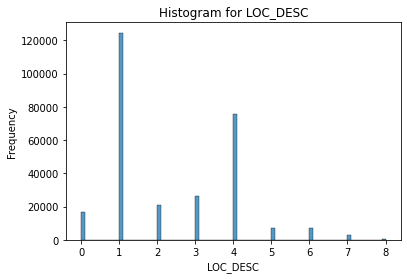

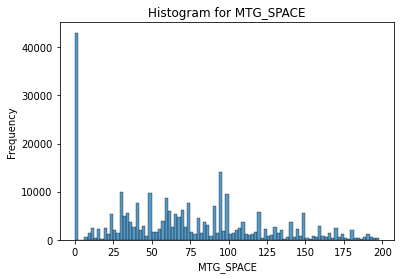

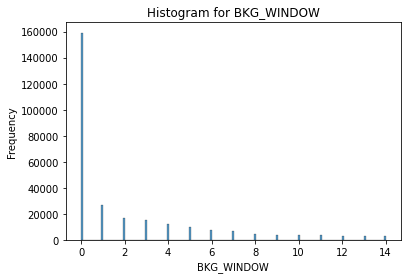

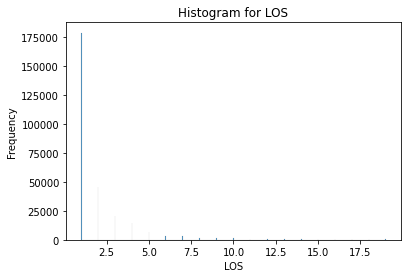

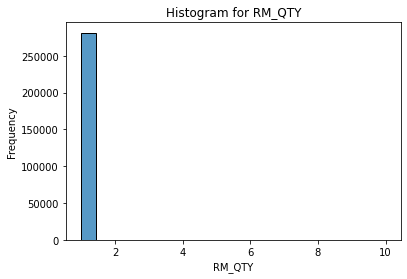

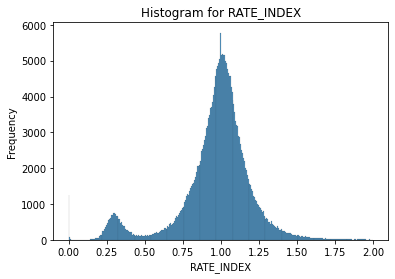

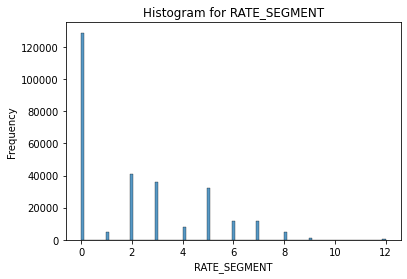

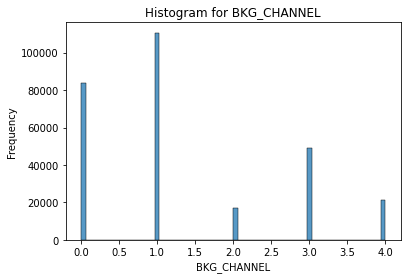

'\nFindings:\n1. Around 10 to 15% of the whole dataset have 0 MTG_SPACE values. We can perform clustering analysis to this also\n2. Nearly half of the data have BKG_WINDOW of 0 days which means the clients are booking and checking-in on the same day\n3. More than half of the clients from the dataset have length of stay of 0 days (no night stay) which are probably \nBusiness type of stay\n4. Almost all of the bookings are just 1 room which means probably that a single group only books for the hotel. This can\nbe checked with the number of guests\n5. Rate index general mean is 1 which means the average booking is just equal to the average room rate. Another is having \nmean rate index of around 0.25 which means there are some bookings which are cheaper than the average rate. Tghe correlation\nwith the type of stay will be examined.\n'

In [11]:
# Regenerate the distribution without the max values
df_new = df[df["MTG_SPACE"] < 200]
df_new = df_new[df_new["BKG_WINDOW"] < 15]
df_new = df_new[df_new["LOS"] < 20]
df_new = df_new[df_new["RATE_INDEX"] < 2]

for num_col in numerical_cols:
    sns.histplot(data=df_new, x=num_col)
    plt.xlabel(f"{num_col}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {num_col}")
    plt.show()

"""
Findings:
1. Around 10 to 15% of the whole dataset have 0 MTG_SPACE values. We can perform clustering analysis to this also
2. Nearly half of the data have BKG_WINDOW of 0 days which means the clients are booking and checking-in on the same day
3. More than half of the clients from the dataset have length of stay of 0 days (no night stay) which are probably 
Business type of stay
4. Almost all of the bookings are just 1 room which means probably that a single group only books for the hotel. This can
be checked with the number of guests
5. Rate index general mean is 1 which means the average booking is just equal to the average room rate. Another is having 
mean rate index of around 0.25 which means there are some bookings which are cheaper than the average rate. Tghe correlation
with the type of stay will be examined.
"""

### Insights

Findings:
1. Around 10 to 15% of the whole dataset have 0 MTG_SPACE values. We can perform clustering analysis to this also
2. Nearly half of the data have BKG_WINDOW of 0 days which means the clients are booking and checking-in on the same day
3. More than half of the clients from the dataset have length of stay of 0 days (no night stay) which are probably 
Business type of stay
4. Almost all of the bookings are just 1 room which means probably that a single group only books for the hotel. This can
be checked with the number of guests
5. Rate index general mean is 1 which means the average booking is just equal to the average room rate. Another is having 
mean rate index of around 0.25 which means there are some bookings which are cheaper than the average rate. Tghe correlation
with the type of stay will be examined.

#### 2.1.3. Box Plot Analysis

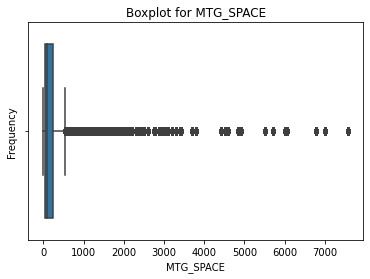

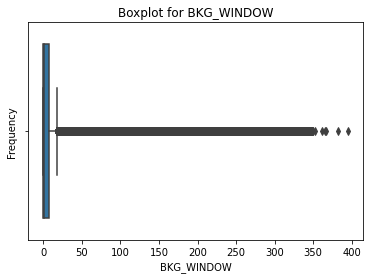

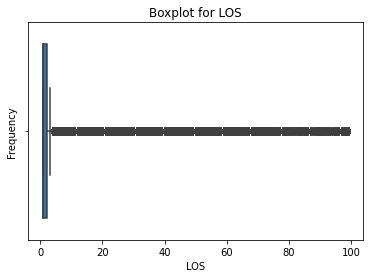

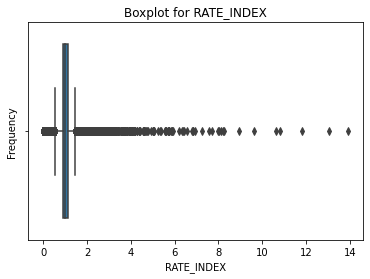

In [12]:
# Generate boxplot for thee continuous numerical variables
cont_cols = ["MTG_SPACE", "BKG_WINDOW", "LOS", "RATE_INDEX"]

for num_col in cont_cols:
    sns.boxplot(data=df, x=num_col)
    plt.xlabel(f"{num_col}")
    plt.ylabel("Frequency")
    plt.title(f"Boxplot for {num_col}")
    plt.show()

### 2.2. Bivariate and Multivariate Analysis

#### 2.2.1. Correlation Heatmap

'\nFindings:\n1. BKG_WINDOW and RATE_INDEX has negative but strong correlation\n2. LOS and GST_QTY has negative but strong correlation\n3. BKG_WINDOW and GST_QTY has strong positive correlation\n4. LOS and BKG_WINDOW has positive correlation\n5. LOS and MTG_SPACE has moderate negative correlation\n\nWe can play around the relationships of these features and calculate/generate other features for the model\n'

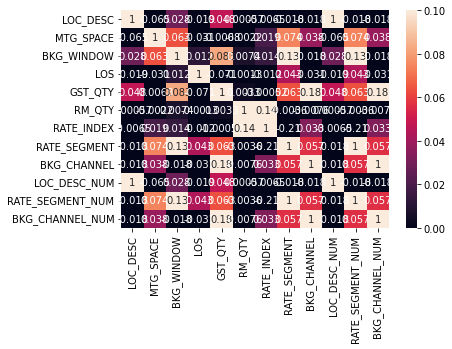

In [13]:
# Generate an overall heatmap for all the features and the target vector
sns.heatmap(data=df.corr(), annot=True, robust=True, vmin=0, vmax=0.1)

"""
Findings:
1. BKG_WINDOW and RATE_INDEX has negative but strong correlation
2. LOS and GST_QTY has negative but strong correlation
3. BKG_WINDOW and GST_QTY has strong positive correlation
4. LOS and BKG_WINDOW has positive correlation
5. LOS and MTG_SPACE has moderate negative correlation

We can play around the relationships of these features and calculate/generate other features for the model
"""

### Insights

Findings:
1. BKG_WINDOW and RATE_INDEX has negative but strong correlation
2. LOS and GST_QTY has negative but strong correlation
3. BKG_WINDOW and GST_QTY has strong positive correlation
4. LOS and BKG_WINDOW has positive correlation
5. LOS and MTG_SPACE has moderate negative correlation

We can play around the relationships of these features and calculate/generate other features for the model

#### 2.2.2. Pairplot

'\nFindings:\n1. As the MTG_SPACE increases, the max BKG_WINDOW shortens relatively but there are few points which still\nhave high BKG_WINDOW values\n2. The max LOS tends to decrease with increasing MTG_SPACE maybe because larger MTG_SPACE are used for Business type of stays\n3. Bookings for larger MTG_SPACE generally were booked at lower RATE_INDEX\n4. Larger LOS has shorter BKG_WINDOW maybe because these events are planned in a shorter timeframe >>> \n5. There are few bookings with short LOS with high RATE_INDEX >>> Business stay\n6. There are few bookings with short BKG_WINDOW having paid at higher RATE_INDEX\n'

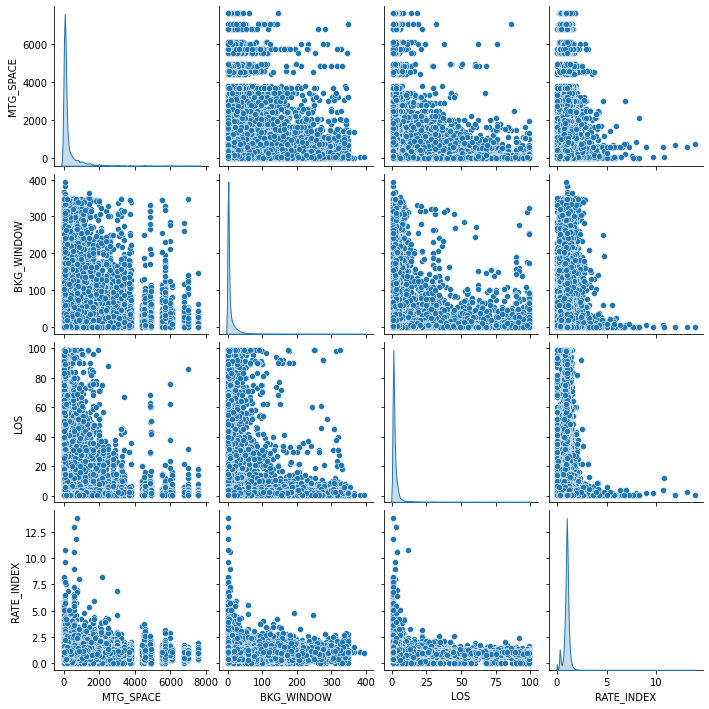

In [14]:
# Create a pairplot for the bivariate analysis
sns.pairplot(df[cont_cols], diag_kind="kde")

"""
Findings:
1. As the MTG_SPACE increases, the max BKG_WINDOW shortens relatively but there are few points which still
have high BKG_WINDOW values
2. The max LOS tends to decrease with increasing MTG_SPACE maybe because larger MTG_SPACE are used for Business type of stays
3. Bookings for larger MTG_SPACE generally were booked at lower RATE_INDEX
4. Larger LOS has shorter BKG_WINDOW maybe because these events are planned in a shorter timeframe >>> 
5. There are few bookings with short LOS with high RATE_INDEX >>> Business stay
6. There are few bookings with short BKG_WINDOW having paid at higher RATE_INDEX
"""

### Insights

Findings:
1. As the MTG_SPACE increases, the max BKG_WINDOW shortens relatively but there are few points which still
have high BKG_WINDOW values
2. The max LOS tends to decrease with increasing MTG_SPACE maybe because larger MTG_SPACE are used for Business type of stays
3. Bookings for larger MTG_SPACE generally were booked at lower RATE_INDEX
4. Larger LOS has shorter BKG_WINDOW maybe because these events are planned in a shorter timeframe >>> 
5. There are few bookings with short LOS with high RATE_INDEX >>> Business stay
6. There are few bookings with short BKG_WINDOW having paid at higher RATE_INDEX

## 3. Feature Engineering and Selection

### 3.1. Average Room Size

In [15]:
# Create another column for the average room size
df["AVE_RM_SIZE"] = df["MTG_SPACE"] / df["RM_QTY"]
df["AVE_RM_SIZE"] = df["AVE_RM_SIZE"].fillna(0)

### 3.2. Booking Lead Time

In [16]:
# Create a booking lead time based on the IQR of BKG_WINDOW
def booking_lead_time(df):
    lead_time_list = list()
    for booking in df["BKG_WINDOW"]:
        if booking == 0:
            lead_time_list.append("Fast")
        elif booking == 1:
            lead_time_list.append("Normal")
        elif 1 < booking <= 7:
            lead_time_list.append("Slow")
        elif booking > 7:
            lead_time_list.append("Special")
    return lead_time_list

df["BKG_LEAD_TIME"] = booking_lead_time(df)

### 3.3. Booking and Check-in Day Category

In [17]:
# Create a new column for booking and check-in day category
def day_category(df, col):
    day_category_list = list()
    for day in df[col]:
        if day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]:
            day_category_list.append("Weekday")
        else:
            day_category_list.append("Weekend")
    return day_category_list

df["CKIN_DAY_CAT"] = day_category(df, "CKIN_DOW")
df["BKG_DAY_CAT"] = day_category(df, "BKG_DOW")

### 3.4. Length of Stay Segment

In [18]:
# Create segment categorical variable for lenght of stay
def length_stay(df):
    ls = list()
    for stay in df["LOS"]:
        if stay == 0:
            ls.append("Day Only")
        else:
            ls.append("Night Stays")
    return ls

df["LOS_SEGMENT"] = length_stay(df)

### 3.5. Feature Selection

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

class TopFeatures:
    
    def __init__(self, data, target_col):
        self.data = data.copy()
        self.target_col = target_col
        self.categorical_cols = self._get_categorical_cols()
        self.numerical_cols = self._get_numerical_cols()

        # Define the column transformer with pipelines for numerical and categorical columns
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', Pipeline([('scaler', StandardScaler())]), self.numerical_cols),
                ('cat', Pipeline([('encoder', OneHotEncoder())]), self.categorical_cols),
            ]
        )

        # Fit column transformer
        self.preprocessor.fit(self.data)

        # Split data into features and target
        self.X = self.preprocessor.transform(self.data)

        # Get the feature names
        numerical_feature_names = self.numerical_cols
        categorical_feature_names = self.preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names(self.categorical_cols)
        feature_names = list(categorical_feature_names) + numerical_feature_names

        # Encode target column into numerical array
        label_encoder = LabelEncoder()
        y_numerical = label_encoder.fit_transform(self.data[self.target_col])

        # One-hot encode the numerical array
        onehot_encoder = OneHotEncoder()
        self.y = onehot_encoder.fit_transform(y_numerical.reshape(-1, 1)).toarray()

        self.idx = self.data.index.values
        
        # Split data into training and validation sets
        self.X_train, self.X_val, self.y_train, self.y_val, self.idx_train, self.idx_val = train_test_split(self.X, self.y, self.idx, test_size=0.3, shuffle=False)

    
    def _get_categorical_cols(self):
        cat_cols = []
        for col in self.data.columns:
            if self.data[col].dtype == 'object':
                cat_cols.append(col)
        return cat_cols

    def _get_numerical_cols(self):
        num_cols = []
        for col in self.data.columns:
            if self.data[col].dtype == 'int64' or self.data[col].dtype == 'float64':
                num_cols.append(col)
        return num_cols

    def _plot_feature_importance(self, feature_importance):
        sorted_idx = feature_importance.argsort()
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
        plt.yticks(range(len(sorted_idx)), self.preprocessor.get_feature_names())
        plt.xlabel("Feature Importance")
        plt.show()
    
    def random_forest(self):
        clf = RandomForestClassifier(random_state=42)
        clf.fit(self.X_train, self.y_train)
        feature_importance = clf.feature_importances_
        top_features = pd.Series(feature_importance, index=self.preprocessor.get_feature_names()).nlargest(10)
        self._plot_feature_importance(feature_importance)
        return top_features
    
    def xgboost(self):
        clf = XGBClassifier(random_state=42)
        clf.fit(self.X_train, self.y_train)
        feature_importance = clf.feature_importances_
        top_features = pd.Series(feature_importance, index=self.preprocessor.get_feature_names()).nlargest(10)
        self._plot_feature_importance(feature_importance)
        return top_features

# Create an instance of the TopFeatures class
df_train_val = df.dropna()

tf = TopFeatures(df_train_val, 'STY_PURPOSE')

# Get the top 10 features using the XGBoost classifier
top_xgb = tf.xgboost()

c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AttributeError: Transformer num (type Pipeline) does not provide get_feature_names.

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class FeatureTransformer:
    def __init__(self, k=10, cat_method='onehot', num_method='standardize'):
        self.k = k
        self.cat_method = cat_method
        self.num_method = num_method
        self.selector = SelectKBest(f_classif, k=self.k)
        
        self.cat_encoder = None
        self.num_scaler = None
        self.transformer = None

    def fit(self, X, y):
        if self.cat_method == 'onehot':
            self.cat_encoder = OneHotEncoder(sparse=False)
        else:
            # Add other categorical encoders as needed
            raise ValueError(f"Invalid categorical encoding method: {self.cat_method}")

        if self.num_method == 'standardize':
            self.num_scaler = StandardScaler()
        else:
            # Add other numerical scaling methods as needed
            raise ValueError(f"Invalid numerical scaling method: {self.num_method}")
        
        self.transformer = make_column_transformer(
            (self.cat_encoder, X.select_dtypes(include=['object', 'category']).columns),
            (self.num_scaler, X.select_dtypes(include=['int64', 'float64']).columns)
        )
        
        transformed_X = self.transformer.fit_transform(X, y)
        self.selector.fit(transformed_X, y)

    def transform(self, X):
        transformed_X = self.transformer.transform(X)
        return self.selector.transform(transformed_X)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self, indices=False):
        return self.selector.get_support(indices)

# Create an instance of the FeatureTransformer class
df_train_val = df.dropna()
X = df_train_val.drop(columns=["STY_PURPOSE"])
y = df_train_val["STY_PURPOSE"]

transformer = FeatureTransformer(k=10, cat_method='onehot', num_method='standardize')
transformer.fit(X, y)
top_k_features = transformer.get_support(indices=True)
X_top_k = transformer.transform(X)

print('Top K features:', top_k_features)
print('Data with top K features:', X_top_k)


Top K features: [ 0  1  2  5 18 19 20 21 26 27]
Data with top K features: [[ 1.          0.          0.         ...  1.         -0.066955
   0.60206596]
 [ 0.          1.          0.         ...  0.          2.71392564
  -0.80491004]
 [ 0.          0.          1.         ...  0.         -0.066955
  -0.80491004]
 ...
 [ 0.          0.          1.         ...  0.         -0.25234705
   0.60206596]
 [ 0.          0.          0.         ...  0.         -0.25234705
  -0.80491004]
 [ 0.          0.          0.         ...  0.         -0.25234705
  -0.80491004]]


c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

class FeatureTransformer:
    def __init__(self, k=10, cat_method='onehot', num_method='standardize'):
        self.k = k
        self.cat_method = cat_method
        self.num_method = num_method
        self.selector = SelectKBest(f_classif, k=self.k)
        
        self.cat_encoder = None
        self.num_scaler = None
        self.transformer = None

    def fit(self, X, y):
        if self.cat_method == 'onehot':
            self.cat_encoder = OneHotEncoder(sparse=False)
            transformed_X = self.cat_encoder.fit_transform(X.select_dtypes(include=['object', 'category']))
        else:
            # Add other categorical encoders as needed
            raise ValueError(f"Invalid categorical encoding method: {self.cat_method}")

        if self.num_method == 'standardize':
            self.num_scaler = StandardScaler()
            transformed_X = np.hstack((transformed_X, self.num_scaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))))
        else:
            # Add other numerical scaling methods as needed
            raise ValueError(f"Invalid numerical scaling method: {self.num_method}")
        
        self.selector.fit(transformed_X, y)

    def transform(self, X):
        transformed_X = self.cat_encoder.transform(X.select_dtypes(include=['object', 'category']))
        if self.num_scaler:
            transformed_X = np.hstack((transformed_X, self.num_scaler.transform(X.select_dtypes(include=['int64', 'float64']))))
        return self.selector.transform(transformed_X)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self, indices=False):
        return self.selector.get_support(indices)


# Create an instance of the FeatureTransformer class
df_train_val = df.dropna()
X = df_train_val.drop(columns=["STY_PURPOSE"])
y = df_train_val["STY_PURPOSE"]

transformer = FeatureTransformer(k=10, cat_method='onehot', num_method='standardize')
transformer.fit(X, y)
top_k_features = transformer.get_support(indices=True)
X_top_k = transformer.transform(X)

# Get the names of the selected features
selected_features = []
if transformer.cat_encoder:
    selected_features += list(transformer.cat_encoder.get_feature_names(X.select_dtypes(include=['object', 'category']).columns))
if transformer.num_scaler:
    selected_features += list(X.select_dtypes(include=['int64', 'float64']).columns)
selected_features = np.array(selected_features)[top_k_features]

# Create a dataframe containing the selected features and the target vector
df_selected = pd.DataFrame(X_top_k, columns=selected_features)
df_selected['STY_PURPOSE'] = y

print('Selected Features:', selected_features)
print('Data with selected features and target vector:', df_selected)


## 4. Model

In [29]:
df = df.drop(columns=["LOC_DESC", "GST_QTY", "LOC_DESC_NUM", "RATE_SEGMENT_NUM", "BKG_CHANNEL_NUM"])

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import pandas as pd
import numpy as np
import multiprocessing
from joblib import Parallel, delayed


class ClassificationModel:
    def __init__(self, df):
        self.df = df.copy()
        self.cat_cols = self.df.select_dtypes(exclude=[np.number]).columns
        self.num_cols = self.df.select_dtypes(include=[np.number]).columns
        self.target_col = "STY_PURPOSE"
        self.le = LabelEncoder()
        self.scaler = StandardScaler()
        self.models = {
            'LogisticRegression': LogisticRegression(random_state=42),
            'RandomForestClassifier': RandomForestClassifier(random_state=42),
            'SVC': SVC(random_state=42)
        }
        self.params = {
            'LogisticRegression': {
                'C': [0.1, 1, 10]
            },
            'RandomForestClassifier': {
                'n_estimators': [100, 200, 300]
            },
            'SVC': {'C': [0.1, 1, 10]}
        }

        # Initialize column transformer
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), self.num_cols),
                ('cat', OneHotEncoder(), self.cat_cols)
            ])
        
        # Fit column transformer
        self.preprocessor.fit(self.df)

        # Split data into features and target
        self.X = self.preprocessor.transform(self.df)

        # Define the target vector and convert into array
        self.y = self.df[self.target_col].values
        self.idx = self.df.index.values
        
        # Split data into training and validation sets
        self.X_train, self.X_val, self.y_train, self.y_val, self.idx_train, self.idx_val = train_test_split(self.X, self.y, self.idx, test_size=0.4, shuffle=False)
    
    def hyperparameter_tuning(self):
        # Hyperparameter tuning using randomized search cross-validation
        results = {}
        num_cores = multiprocessing.cpu_count()
        for name, model in self.models.items():
            params = self.params[name]
            clf = RandomizedSearchCV(model, params, cv=5, n_iter=10, n_jobs=num_cores, random_state=42, scoring='accuracy')
            clf.fit(self.X_train, self.y_train)
            results[name] = {'best_params': clf.best_params_, 'best_score': clf.best_score_}
        
        return results
    
    def train_and_evaluate(self, model_name, params=None):
        # Train and evaluate the model
        model = self.models[model_name]
        if params is not None:
            model.set_params(**params)
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_val)
        accuracy = accuracy_score(y_true=self.y_val, y_pred=y_pred)

        # Print the accuracy
        print(f"The accuracy of the {model_name} model is {round(accuracy, 2) * 100}%")

In [32]:
# Instantiate the MLModel class
df_train_val = df.dropna()
model = ClassificationModel(df_train_val)

# Preprocess the data
result = model.hyperparameter_tuning()

# Evaluate
model.train_and_evaluate("SVC", params=result["SVC"]["best_params"])

c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Rhaniel Rhett\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The accuracy of the SVC model is 100.0%
